In [1]:
import os
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
from utils.plots import plot_l, plot_model_pred, plot_losses
from utils.models import UNet, save_model, load_model
from utils.metrics import evaluate_model
from utils.training import train_cnn, load_losses
device = "cuda" if torch.cuda.is_available() else "cpu"
import random

/home/default/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = transforms.Compose([
    transforms.Grayscale(), 
    transforms.Resize((256, 256)),
    transforms.ToTensor()          
])

In [3]:
def process_images(input_folder):
    grayscale_images = []
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)
            img_gray = transform(img)
            grayscale_images.append(img_gray)
            print(f"Processed {image_path} and converted to grayscale")
    return grayscale_images

def plot_pred(image, model, device, rot = 0):
    if rot == 0:
        plot_l(image)
        plot_model_pred(image, model, device)
    if rot == 90:
        plot_l(torch.rot90(image, k=1, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=1, dims=(1, 2)), model, device)
    if rot == -90:
        plot_l(torch.rot90(image, k=-1, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=-1, dims=(1, 2)), model, device)
    if rot == 180:
        plot_l(torch.rot90(image, k=2, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=2, dims=(1, 2)), model, device)

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed
set_seed(1)

In [5]:
input_folder = '/home/default/image-colorization/test_images/'

grayscale_images_list = process_images(input_folder)

model = load_model(UNet(), "/home/default/image-colorization/models/unet_l1smooth_trained.pth").to(device)

Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_6.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_3.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_4.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.06.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_2.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_1.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_5.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_9.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-20

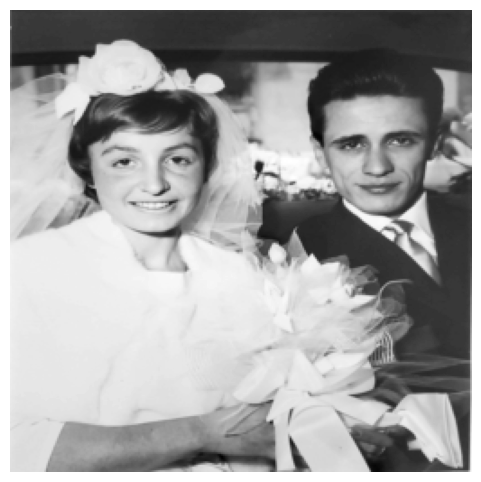

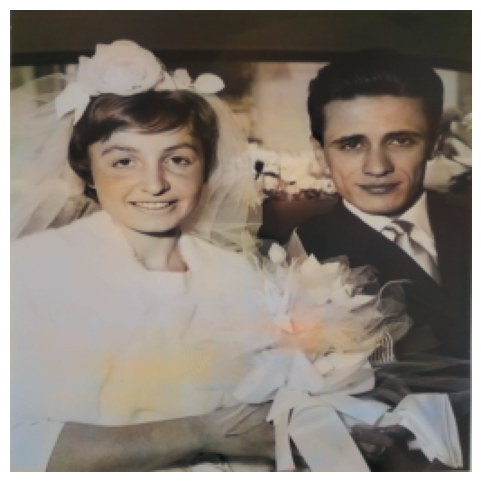

In [6]:
plot_pred(grayscale_images_list[3], model, device)